**Đọc file genbank, nguồn https://www.ncbi.nlm.nih.gov/nuccore/AB106130.2**

In [ ]:
from Bio import SeqIO
file_path = r"C:\Users\HP\Downloads\sequence\p10.gb"

In [50]:
genbank_object=SeqIO.read(file_path,'gb')

In [51]:
record_id = genbank_object.id
print (record_id)

AB106130.2


In [52]:
record_name=genbank_object.name
print (record_name)

AB106130


In [53]:
record_seq=genbank_object.seq
sequence_length=len(record_seq)
print (sequence_length)
print (record_seq)

1873
CTGCAGCGTCAGCAGCGCGGCGCGATTAAACTCACGGTCGTTGTACGTCGACGCCGAGTCGTCCGTAGCATACACGTAATACTTGTACATGTTGGCGAATGATGCGGCTGCACTTTATATACTGCTGTGCTCCGCAAACCTCGCATAAACACACGTGATGGATAACAAAATGTACGTGCGCATGGAGATTAAGTTTGACGAGGACACGGGCCGTTTGCAAATTGGTGACCGGGACGTGTTTGTGCGCGTGTTTGAGCCCGGCCAAGAGGTGTTTGACGAAACGTTGGACCAATACCACCAGTTTCCCGGCGTGGCCACAGACGTTGTGTTTCCGCAAGTGGACACGGGCGCGACGGTGAGCGTGCACACCGCGGCCGGCGCGTACTCAGGGCCGCTAACCGCCAGCTGCTTCAATTACCACGTGTGCAACAAGCGCTTCGTGTTTGGTGTTTTGCCGGCGCTCGAGGTGCCCGCCGACGTAAGCCCGCACCTGCGCGTCGGCGCGCCCATCCTCTGCAACGAGCAATTGGTGTCCGTGGTGACGGCCGTGCACGAGCGCGCCGACGGCGTCTGGCTGGTGCCCGTGACGGGCGTGCGCGGGCCGCACCAGGTGTCGGGACACGCGCGCGTGTGCAATGGCGTGCGCGCAGAGCGCCTGCGCGCCGGGCGGTCGGTGTACGGCGCGGTGCAACTACCATATGACAAACTGAAGACGCACGCGCTATCGCAAACGGCGCCACACGCTGAAGCTTCCGAATCGTGCGCGCTGTTTTACAATGACTCTGAAGTGCGCATTACTTTTAACAAAGGCAGTTTTGAATTGATGCACTGGCGATTGCCGGGGCCTTTTGTTGCCACAGCGTTAAATAAGCATTATTGACAATTTATTATTATATCATTGAAATAGTTATAATATTTTACCATGTCCAAACCAAGCATTTTACAACAAATTTTGACAGCTGTGCAAGATGTCGACACAAAAGTTGACGCGTTGC

In [54]:
#xuất ra thông tin chi tiết của bản ghi
annotations = genbank_object.annotations

In [55]:
print (annotations)

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'VRL', 'date': '09-MAR-2024', 'accessions': ['AB106130'], 'sequence_version': 2, 'keywords': [''], 'source': 'Antheraea pernyi nucleopolyhedrovirus', 'organism': 'Antheraea pernyi nucleopolyhedrovirus', 'taxonomy': ['Viruses', 'Viruses incertae sedis', 'Naldaviricetes', 'Lefavirales', 'Baculoviridae', 'Alphabaculovirus', 'Alphabaculovirus anpernyi'], 'references': [Reference(title='Construction of p10 promoter-based transfer vector of Antheraea pernyi nucleopolyhedrovirus', ...), Reference(title='Direct Submission', ...)], 'comment': 'On Mar 9, 2004 this sequence version replaced AB106130.1.'}


In [56]:
#xuất thông tin về vùng DNA được gắn nhãn(feature)
features=genbank_object.features
feature_types=[feature.type for feature in features]
feature_types=set(feature_types)
feature_type=list(feature_types)

In [57]:
print (feature_types)

{'regulatory', 'source', 'gene', 'CDS'}


GC Content Calculator

In [78]:
from Bio.SeqUtils import gc_fraction
gc_fraction(record_seq)

0.5232247730912973

Dịch mã vùng CDS

In [59]:
for feature in features:
    if feature.type == "CDS":
        protein = feature.qualifiers.get("translation")
        print(protein)

['MDNKMYVRMEIKFDEDTGRLQIGDRDVFVRVFEPGQEVFDETLDQYHQFPGVATDVVFPQVDTGATVSVHTAAGAYSGPLTASCFNYHVCNKRFVFGVLPALEVPADVSPHLRVGAPILCNEQLVSVVTAVHERADGVWLVPVTGVRGPHQVSGHARVCNGVRAERLRAGRSVYGAVQLPYDKLKTHALSQTAPHAEASESCALFYNDSEVRITFNKGSFELMHWRLPGPFVATALNKHY']
['MSKPSILQQILTAVQDVDTKVDALQAQLTELDGKVQPLDGLSEQLTALDTKVTTIQDILGGAEIPDIPDVPLPDNPLNKTRSQAKLK']
['NRIAIKTLTTAAKALTRIAIKASSVVGIVLILFTLADLVLALWDPFGYSNMFPREFPDDLSRTFLTAYFETLDANSSREIIEFLPEFFADFVETDDDAMFQSLYHLLDYVAALEVNSDGQMLQLDESDQITDFDEATLVGQALASSSLYTRLEFMQYTFRQNTLLDMNENNNKLNRVVAGLFLLNTGAAVAAFILYKELTFFVYFAIFLMIALYYLIKEPYEYFKTIDLLF']


Tìm vị trí motif

In [60]:
motif = "ATG"
positions = [i for i in range(len(record_seq)) if record_seq[i:i+3] == motif]
print(positions)

[88, 98, 101, 157, 169, 181, 635, 698, 776, 823, 922, 968, 1037, 1127, 1193, 1236, 1272, 1373, 1577, 1631, 1721, 1790, 1814, 1820, 1859]


Chuyển thành file fasta 

In [61]:
fasta_format_string = f">record_name\n{record_seq}\n"
with open("AB106130.fasta", "w") as f:
    f.write(fasta_format_string)

print("đã lưu file AB106130.fasta")

đã lưu file AB106130.fasta


**Thống kê feature, nguồn genome https://www.ncbi.nlm.nih.gov/nuccore/cp013957**

In [62]:
import pandas as pd
from collections import Counter

In [63]:
from Bio import SeqIO
import pandas as pd
from collections import Counter

In [64]:
file_path=r"C:\Users\HP\Downloads\sequence\cp013957.gb"

In [81]:
genbank_object=SeqIO.read(file_path,'gb')

In [82]:
record_seq=genbank_object.seq
sequence_length=len(record_seq)
print (sequence_length)

3085555


In [66]:
all_feature_types=[feature.type for feature in genbank_object.features]

In [67]:
len(all_feature_types)

6399

In [68]:
feature_types=set(all_feature_types)
print (feature_types)

{'tRNA', 'misc_binding', 'CDS', 'tmRNA', 'source', 'rRNA', 'gene', 'ncRNA'}


In [69]:
feature_counts=Counter(all_feature_types)

In [70]:
feature_counts.keys()

dict_keys(['source', 'gene', 'CDS', 'misc_binding', 'tRNA', 'ncRNA', 'rRNA', 'tmRNA'])

In [71]:
feature_counts['gene'] 
print (feature_counts['gene'])

3194


In [72]:
for key, value in feature_counts.items():
    print(key,value)


source 1
gene 3194
CDS 3114
misc_binding 10
tRNA 60
ncRNA 3
rRNA 16
tmRNA 1


tạo DataFrame

In [73]:
del feature_counts['source']

In [74]:
dataframe=pd.DataFrame(feature_counts.items(),columns=['feature','count'])

In [75]:
dataframe.shape

(7, 2)

In [76]:
print (dataframe)

        feature  count
0          gene   3194
1           CDS   3114
2  misc_binding     10
3          tRNA     60
4         ncRNA      3
5          rRNA     16
6         tmRNA      1


Tạo bar chart 

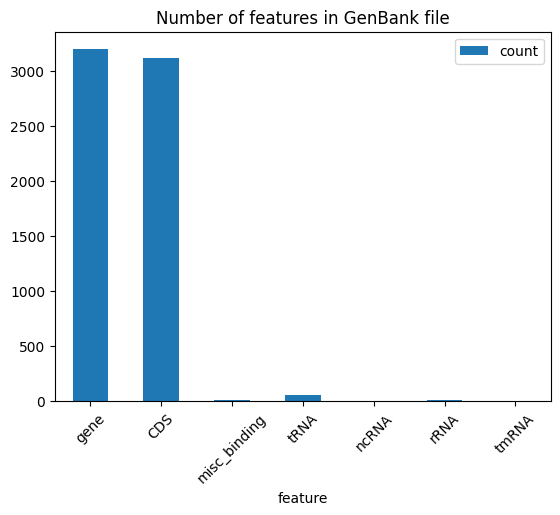

In [77]:
import matplotlib.pyplot as plt
dataframe.plot.bar(x='feature', y='count', rot=45, title='Number of features in GenBank file')
plt.show()

-> Dataset chủ yếu là gene protein-coding, các RNA chức năng và misc_binding chiếm ít. Số lượng CDS gần bằng số lượng gene do đây là genome vi sinh vật 